                                      
Name: __________________  E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: __________________  E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Group: _____

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Tutor: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Date: __________________

---

**Notes from Tutor for protocoll version  _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Date of Correction: __________________ Grade/Result: __________________

---
# Properties Of Elementary Particles - Part 2 
---     

In the first part of this lab course, you have spent some time working with and understanding silicon pixel detectors. These silicon pixels form the inner tracker of the CMS detector as seen in the cross section below. When particles such as electrons, muons or hadrons make their way through the detector, they set off the pixel detectors. Since the coordinates of each pixel is known, this data can be used to reconstruct the path of particles. Due to the strong magnetic field produced by the superconducting solenoid, the path of charged particles is curved as the Lorentz force is acting upon them. Since this force is a function of the particles velocity, the track measurment serves as a way to determine the particles momentum. The more momentum a particle has, the more straight its path through the $B$-field is. The accuracy of this indirect (transverse) momentum measurement is given by the "Glückstern Formel"

\begin{equation}
\frac{\Delta p_T}{p_T} \propto \frac{\Delta x}{B L^2 \sqrt{N}}  \cdot p_T,
\end{equation}

where $\Delta x$ and $\Delta p_T$ are the uncertainty of the position and transverse momentum measurements, B is the strength of the magnetic field, L the distance travelled through the magnetic field and N the number of position measurements taken. Naturally, the resolution of the detector gets worse with higher transverse momenta, as the curvature of the taken path decreases and therefore small inaccuracies in the position measuremnts can lead to large uncertainties in the reconstructed momentum. The spacial resolution offered by the silicon pixel detectors at the CMS experiment is on the order of $ \Delta x \approx 10 \mu m$. 

In this part of the lab course $\textit{Properties of Elementary Particles}$, we will be exploring a real dataset from the CMS Experiment and examining the impact of the detectors resulution on its measurements.

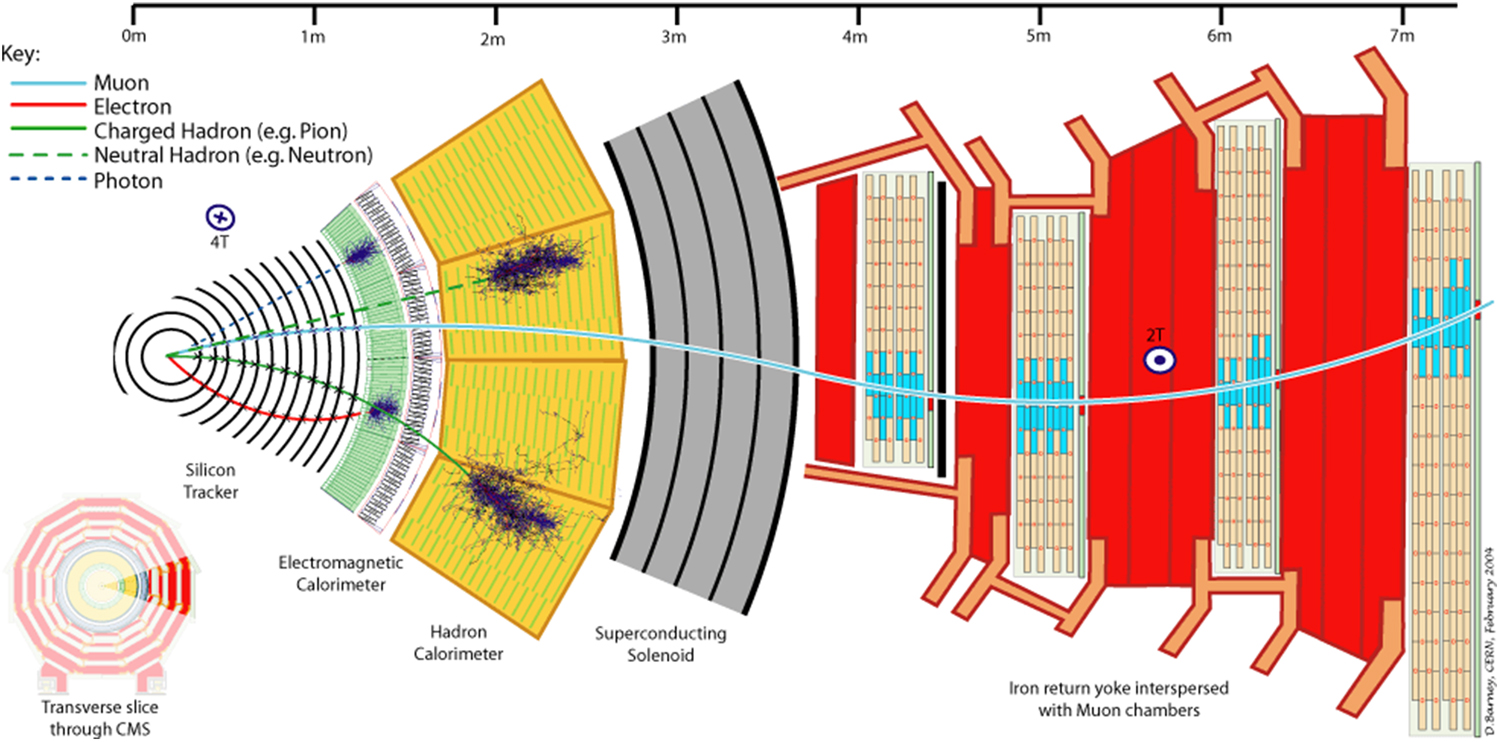

Before we can start, some imports are needed, so execute the following code cell:

In [1]:
#### imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector as vec
import kafe2 as kfe
from scipy.special import voigt_profile as voigt 


m_mu = 0.1056583745 #mass muon in GeV

<div class="alert alert-warning">
<strong><big> Part 1 </big></strong> 
    
Preparing the dataset
</div>

In particle physics, a huge amount of data is often required to analyze fundamental particles as interesting events are typically rare. Consequently, some level of care is neccessary to ensure that data is handled efficiently and our analysis finishes in a reasonable time.  

The Goal of this lab is to familiarize ourselves with commonly used librarys and programming practices and use them to estimate the decay width of the Z-Boson. You should already be familiar with the *pandas* library, either from previous labs or from your preparation. If not, be sure to study the pandas_basics.ipynb notebook. Although some basic remarks will be given throughout this lab.


---
#  *pandas* 
---
Throughout this lab, most of the data will be handled using the [*pandas*](https://pandas.pydata.org/docs/getting_started/overview.html) library.

The pandas package
is widely used in scientific data analysis and is well supported by a large community, 
aiming at  "becoming the most powerful and flexible open source data analysis/manipulation 
tool" (quoted from the pandas documentation). 

The flexibility of *pandas* in data management and analysis by far exceeds what is possible 
with e.g. *numpy* arrays alone. It shows its strength when large data sets with complex
data structures need to be handled. Operations on data in *pandas* are vectorized, 
similar to operations on arrays in *numpy*, and therefore efficient data processing
is possible if the vectorization capabilities are used. In some cases, this requires
some re-thinking compared to classical approaches like loops
over data elements. Vectorization techniques optimally utilize the capabilities of 
modern CPUs, and make use of parallel execution, which drastically reduces computational time on
large data sets. 

Another powerful feature of *pandas* is its advanced indexing capability,
called "multi-index" or "hierarchical index". This can be applied at both the
index and the column level of a *pandas* DataFrame, turning it into a 
multi-dimensional data structure. 

Let's start by loading the dataset:

---

In [2]:
#combined dataset from Cern Open Data:
#https://opendata.cern.ch/record/12365
#https://opendata.cern.ch/record/12366

# read data
data = pd.read_csv('Run2012BC_DoubleMuons_prefiltered.zip', compression='zip',header=[0,1])

#remove columns not neccesary for this course
data.drop(['dxy', 'dz', 'Iso3'], axis=1,level = 1, inplace=True)

#display the data
data

mu1                                mu2                               
           Q       eta       phi         pt   Q       eta       phi         pt
0          1  0.091344 -1.409967  56.900930  -1 -0.472488  1.688872  34.670677
1          1 -0.676351 -2.748835  17.309220   1 -0.535394  0.050149  10.619157
2          1 -0.605774 -2.633774  17.548424  -1  0.265170  0.087667  11.469824
3          1 -2.116007 -0.192693  11.531023  -1 -1.491145 -1.541487  17.382690
4          1  2.320034 -2.977990   7.915634  -1  1.026221  2.870090  15.961810
...       ..       ...       ...        ...  ..       ...       ...        ...
25052238  -1 -0.346839 -1.466133  34.915478   1 -0.313330  1.776086  38.507280
25052239   1  0.230319 -0.514094   8.320309  -1  0.410674 -0.560857  13.053062
25052240  -1  1.304013  2.583171  42.090843   1  0.094415 -0.940269  37.137700
25052241   1  0.333813  2.523907   8.658760  -1  0.207239  2.332713  17.250345
25052242   1  0.460759  1.654328  21.872807  -1  0.578330  1.982666  11.697999

[25052243 rows x 8 columns]

The table above is a pandas `DataFrame`. It contains measurements for events that were recorded at the CMS detector. Specifically, it contains information about muon-pairs that were created after a collision took place. The `DataFrame` uses multi-indexing to differentiate between the measurements of both muons.


In our DataFrame, each row constitutes a pair of muons (mu1 and mu2) recorded at the CMS detector with their corresponding
transverse momentum $p_T$ (pt), pseudorapidity $\eta$ (eta) and polar angle $\phi$ (phi).

### Some remarks on the choice of variables

As the name implies, the LHC uses hadrons (mostly protons) in its experiments. In any given collission however, it is the partons (quarks) that actually collide. Since the total momentum of the proton is distributed between the induvidual partons, the z component of the momentum of the collision is unknown. Therefore, particles resulting from the collision are randomly boosted along the z-axis. Consequently, the particles are described using parameters that are indpendent of such boosts. Both $\phi$ and $p_T$ are unaffected by Lorentz boosts along the z-axis. For the rapidity y, it is the difference between rapidities that remains constant between boosts. For high energy particles with (E >> m), such as those in a particle accelarator, the pseudorapidity $\eta$ and the actual rapidity y are approximately equal, making them interchangable.

 


There are two ways to address a column in a dataframe `df` with name 'tag' 
and use it in a calculation or assign it to a variable:
  - `a = df['tag']` or
  - `a = df.tag`
  
*pandas* also suports multi-indexing, i.e. sub-tags, e.g.  
  - `a = df['tag', 'subtag']`   
  - `a = df.tag.subtag`

Adding a new variable, e.g. calculated with some function from the existing
columns, works as follows:
  - ` df['newtag'] = np.func(df.tag)`
 
Note:
  - `df.newtag = np.func(df.tag)` does not work
    
Some examples of accesing the data are shown in the cells below.



In [3]:
#access the the part of the dataframe belonging to mu1 
data.mu1

,Q,eta,phi,pt
0,1,0.091344,-1.409967,56.900930
1,1,-0.676351,-2.748835,17.309220
2,1,-0.605774,-2.633774,17.548424
3,1,-2.116007,-0.192693,11.531023
4,1,2.320034,-2.977990,7.915634
...,...,...,...,...
25052238,-1,-0.346839,-1.466133,34.915478
25052239,1,0.230319,-0.514094,8.320309
25052240,-1,1.304013,2.583171,42.090843
25052241,1,0.333813,2.523907,8.658760


In [4]:
# acces the transverse momentum data of mu2 directly as numpy array
data.mu2.pt.to_numpy()

array([34.670677, 10.619157, 11.469824, ..., 37.1377  , 17.250345,
       11.697999])

<div class="alert alert-warning">
<strong><big> Exercise 1.1 </big></strong> 

- Create a histogram of the angle $\phi$ for each of the muons

- Combine the measurements of $\phi_1$ and $\phi_2$ in a single array and display it in a histogram
</div>

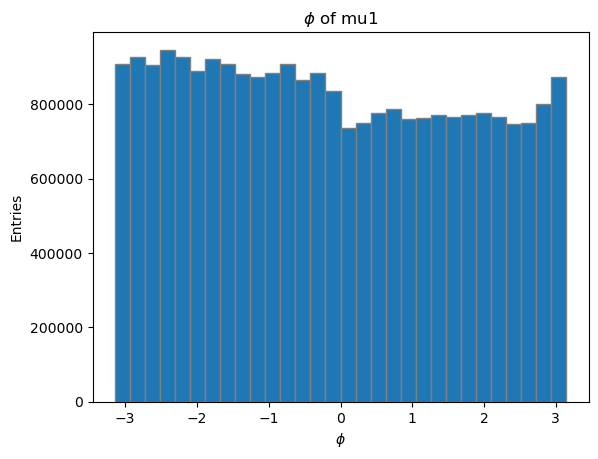

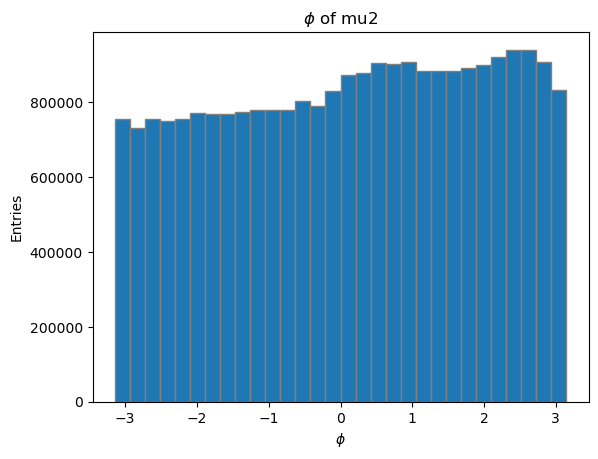

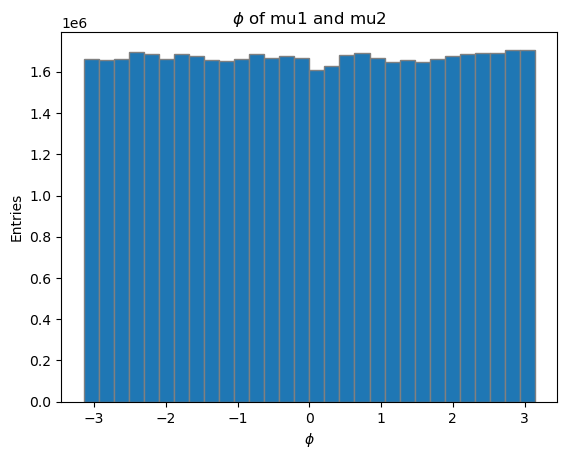

In [5]:
plt.hist(data.mu1.phi, bins = 30, ec = "grey")
plt.title("$\phi$ of mu1")
plt.xlabel("$\phi$")
plt.ylabel("Entries")
plt.show()

plt.hist(data.mu2.phi, bins = 30, ec = "grey")
plt.title("$\phi$ of mu2")
plt.xlabel("$\phi$")
plt.ylabel("Entries")
plt.show()

plt.hist(np.concatenate((data.mu2.phi,data.mu1.phi)), bins = 30, ec = "grey")
plt.title("$\phi$ of mu1 and mu2")
plt.xlabel("$\phi$")
plt.ylabel("Entries")
plt.show()

Let's now use this data. The most important quantity we will be dealing with in this lab is the [*invariant mass*](https://en.wikipedia.org/wiki/Invariant_mass). It is a measure of the total mass of a particle or system and can therefore be used to find the mass of the particle that decayed into the dimuon pair.

For a two-particle-decay, the invariant mass is given by:

\begin{equation}
{M_{\rm inv}}^2 = (\tilde{p_1} + \tilde{p_2})^2 = 
 2 \left ({m_\mu}^2 + E_1 E_2 - \vec{p_1} \cdot \vec{p_2} \right)
\end{equation}

This formula is rather complicated and would be a hassle to implement manually. 
Since such computations are common place in particle physics, packages have been written to assist with them. 

One such package is [Vector](https://github.com/scikit-hep/vector). In addition to 2D and 3D vectors, Vector can also handle the  four-vectors relevant in particle physics.

A four vector can be created with entire arrays using the following simlpe code:

v4_mu1 = vec.array({"pt":   data.mu1.pt.to_numpy(), 
                    "eta":  data.mu1.eta.to_numpy(), 
                    "phi":  data.mu1.phi.to_numpy(), 
                    "mass": np.ones(len(data.mu1.pt.to_numpy())) * m_mu})                                 
                    
The methods of the *vector* package can now be used to extract information 
from (internal) four-vector operations. Methods to perform Lorentz-boosts of 
a four-vector or to calculate scalar products of two vectors are also available. 

Here is a list of the most relevant examples:

```
.t              # time component of space-time four-vector
.E              # energy of a momentum four-vector
.x, .y, .z      # x, y and z components 
.pt             # transverse momentum
.phi            # azimuth angle
.mass           # invariant mass
.rapidity       # rapidity
.eta            # pseudo-rapidity
.gamma          # gamma-factor, E / mass 
.beta           # velocity / c
.deltaphi(v4_2) # phi-difference wrt. a second vector v2
.boost_p4(v4_2) # Lorentz-boost in direction of a second vector v2
.dot(v4_2)      # scalar product with second vector v2
```



<div class="alert alert-warning">
<strong><big> Exercise 1.2 </big></strong> 
    
- Create a four vector for both of the muons in the DataFrame
- Calculate the total invariant mass M of the dimuon pair and add it as a column to the DataFrame
</div>

In [6]:
#define 4 vector for both muons to calculate invariant mass efficiently
mass = np.ones(len(data.mu1.pt.to_numpy())) * m_mu

v4_mu1 = vec.array({"pt":   data.mu1.pt.to_numpy(), 
                    "eta":  data.mu1.eta.to_numpy(), 
                    "phi":  data.mu1.phi.to_numpy(), 
                    "mass": mass})

v4_mu2 = vec.array({"pt":   data.mu2.pt.to_numpy(), 
                    "eta":  data.mu2.eta.to_numpy(), 
                    "phi":  data.mu2.phi.to_numpy(), 
                    "mass": mass})

#calculate Invariant Mass
data["M"] = (v4_mu1+v4_mu2).mass

#sort the df
data = data.sort_index(axis=1)

data

M mu1                                mu2            \
                      Q       eta       phi         pt   Q       eta   
0         92.366513   1  0.091344 -1.409967  56.900930  -1 -0.472488   
1         26.787653   1 -0.676351 -2.748835  17.309220   1 -0.535394   
2         30.540502   1 -0.605774 -2.633774  17.548424  -1  0.265170   
3         19.836849   1 -2.116007 -0.192693  11.531023  -1 -1.491145   
4         16.318465   1  2.320034 -2.977990   7.915634  -1  1.026221   
...             ...  ..       ...       ...        ...  ..       ...   
25052238  73.252661  -1 -0.346839 -1.466133  34.915478   1 -0.313330   
25052239   1.956354   1  0.230319 -0.514094   8.320309  -1  0.410674   
25052240  92.776260  -1  1.304013  2.583171  42.090843   1  0.094415   
25052241   2.808797   1  0.333813  2.523907   8.658760  -1  0.207239   
25052242   5.561153   1  0.460759  1.654328  21.872807  -1  0.578330   

                               
               phi         pt  
0         1.688872  34.670677  
1         0.050149  10.619157  
2         0.087667  11.469824  
3        -1.541487  17.382690  
4         2.870090  15.961810  
...            ...        ...  
25052238  1.776086  38.507280  
25052239 -0.560857  13.053062  
25052240 -0.940269  37.137700  
25052241  2.332713  17.250345  
25052242  1.982666  11.697999  

[25052243 rows x 9 columns]

As you can see in the DataFrame above, not all pairs of muons listed in the df are actually dimuon pairs. (A dimuon pair is a pair of muons with opposite charges.) Since the Z Boson has no net charge, it must decay into particles with no net charge aswell. Therefore, the corresponding rows of the DataFrame must be removed.

*pandas*, like *numpy*, supports boolean or masked indexing; 
to replace, e.g., all negative numbers in a column by zeros, one can use:
  - ` df[df.tag < 0] = 0.`
  
Of course, any other numer of function can be inserted instead of zero; to turn
the column to positive numbers, one could use
  - ` df[df.tag < 0] *= -1`

Boolean masking is ideal for filtering data; To filter out all non-zero entries, one could use
  - `filtered_df = df[df.tag > 0]`
  
This approach is significantly faster than looping through the data manually using python.
  
It is probably needless to say the *pandas* is a perfect replacement and even
more powerful than *MS Excel* or *LibreOffice Calc* or similar tools; 
in fact, a function *pandas.read_excel()* also exists.

<div class="alert alert-warning">
<strong><big> Exercise 1.3 </big></strong> 
Remove all pairs of muons from the DataFrame that do not constitute a dimuon pair using boolean masking
</div>

In [7]:
data = data[data["mu1","Q"] + data["mu2","Q"] == 0]

data

M mu1                                mu2            \
                      Q       eta       phi         pt   Q       eta   
0         92.366513   1  0.091344 -1.409967  56.900930  -1 -0.472488   
2         30.540502   1 -0.605774 -2.633774  17.548424  -1  0.265170   
3         19.836849   1 -2.116007 -0.192693  11.531023  -1 -1.491145   
4         16.318465   1  2.320034 -2.977990   7.915634  -1  1.026221   
5         92.890014  -1 -2.166029  1.001865  44.412205   1 -2.181235   
...             ...  ..       ...       ...        ...  ..       ...   
25052238  73.252661  -1 -0.346839 -1.466133  34.915478   1 -0.313330   
25052239   1.956354   1  0.230319 -0.514094   8.320309  -1  0.410674   
25052240  92.776260  -1  1.304013  2.583171  42.090843   1  0.094415   
25052241   2.808797   1  0.333813  2.523907   8.658760  -1  0.207239   
25052242   5.561153   1  0.460759  1.654328  21.872807  -1  0.578330   

                               
               phi         pt  
0         1.688872  34.670677  
2         0.087667  11.469824  
3        -1.541487  17.382690  
4         2.870090  15.961810  
5        -2.263137  48.753174  
...            ...        ...  
25052238  1.776086  38.507280  
25052239 -0.560857  13.053062  
25052240 -0.940269  37.137700  
25052241  2.332713  17.250345  
25052242  1.982666  11.697999  

[21359721 rows x 9 columns]

<div class="alert alert-warning">
<strong><big> Exercise 1.4 </big></strong> 
    
- Plot the characteristic dimuon spectrum, a histogram of the invariant mass M calculated above. Due to the large range in values, consider using logarithmic scaling.
- Identify the resonances of the J/$\Psi$ meson and Z Boson
- What other resonances can you see? (You can use the [*pdg*](https://pdg.lbl.gov/2022/listings/contents_listings.html) as a reference or simply search the internet for particles of a certain mass)
</div>

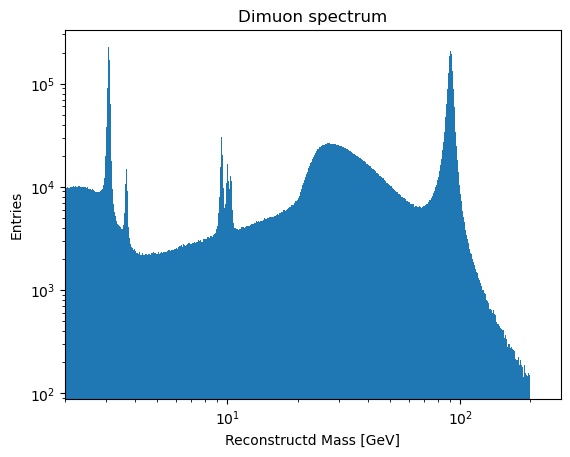

In [8]:
#plot entire spectrum
Mmn=0.5
Mmx=200.
bins = np.exp(np.linspace(np.log(Mmn), np.log(Mmx), 2000))
plt.hist(data['M'], bins = bins)
plt.xscale('log')
plt.xlim(left = 2)
plt.title("Dimuon spectrum")
plt.xlabel("Reconstructd Mass [GeV]")
plt.ylabel("Entries")
plt.yscale('log')
plt.show()

**Particles in spectrum**:


| Resonance                  | Mass                 | Width              | <nobr>Lifetime ($\hbar$/Width)</nobr>  | Spin | 
|:---------------------------|:---------------------|:-------------------|:---------------------------------------|:-----|
| J/$\psi$(1S)               | $\mbox{3.097 GeV}$   | $\mbox{92.6 keV}$  | $7.108\times10^{-21} \,\mathrm{s}$     |  $1$ |
| $\psi$(2S)                 | $\mbox{3.686 GeV}$   | $\mbox{294 keV}$   | $2.239\times10^{-21} \,\mathrm{s}$     |  $1$ |
| $\Upsilon$(1S) (+2S,3S...) | $\mbox{9.460 GeV}$   | $\mbox{54.02 keV}$ | $1.218\times10^{-20} \,\mathrm{s}$     |  $1$ |
| Z boson                    | $\mbox{91.188 GeV}$  | $\mbox{2.495 GeV}$ | $2.638\times10^{-25} \,\mathrm{s}$     |  $1$ |

<div class="alert alert-warning">
<strong><big> Exercise 1.5 </big></strong> 
    
   - Use boolean masking to extract the data comprising the J/$\Psi$ and Z resonances
    
   - Plot a histogram of the respective resonances
    
   - Why are the resonances (especially the Z resonance) asymmetrical?
            
</div>

<div class="alert alert-info">
    

Hint:
   - You can apply multiple filters simultaniously using the "&"- Symbol e.g:
     
       `mask1 = df.tag > min`       
       `mask2 = df.tag < max`   
       `new_df = df[mask1 & mask2]`
    
    
   - Or directly using parentheses:
    
       `new_df = df[(df.tag > 0) & (df.tag < 5)]`  
                                                                                           
   - The start- and enpoints of both resonances are given below
    
            
</div>

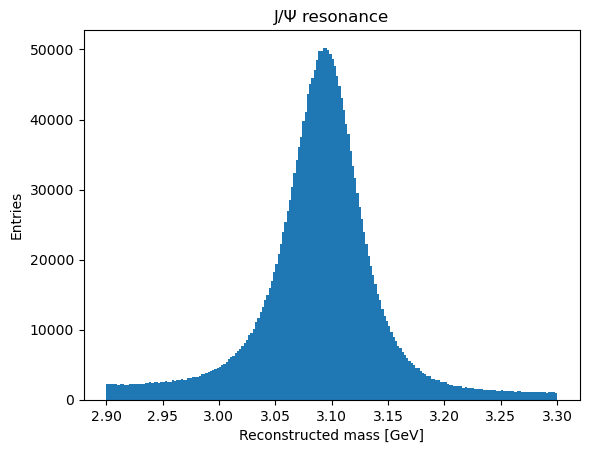

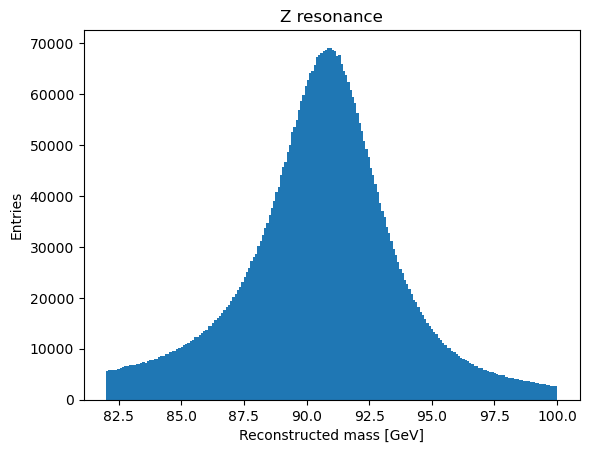

In [9]:
#filter out jpsi and zboson peaks

#Start and end Point of the jpsi and Z resonance in the invariant mass Spectrum

jpsiStart = 2.9  #GeV
jpsiEnd = 3.3    #GeV
zbosonStart = 82 #GeV
zbosonEnd = 100  #GeV

#filter out respective resonances
jpsi   = data[(data.M > jpsiStart) & (data.M < jpsiEnd)]
zboson = data[(data.M > zbosonStart)  & (data.M < zbosonEnd)]

#plot respective resonances
plt.hist(jpsi.M, bins = 200)
plt.title("J/Ψ resonance")
plt.xlabel("Reconstructed mass [GeV]")
plt.ylabel("Entries")
plt.show()

plt.hist(zboson.M, bins = 200)
plt.title("Z resonance")
plt.xlabel("Reconstructed mass [GeV]")
plt.ylabel("Entries")
plt.show()

<div class="alert alert-warning">
<strong><big> Exercise 1.6 </big></strong> 
    
   - Plot the distribution of the pseudorapidity $\eta$ for both muons for both the $J/\Psi$ and the Z resonance.
            
</div>

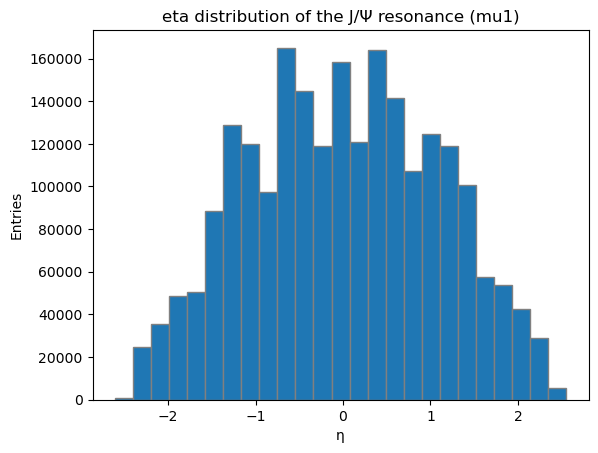

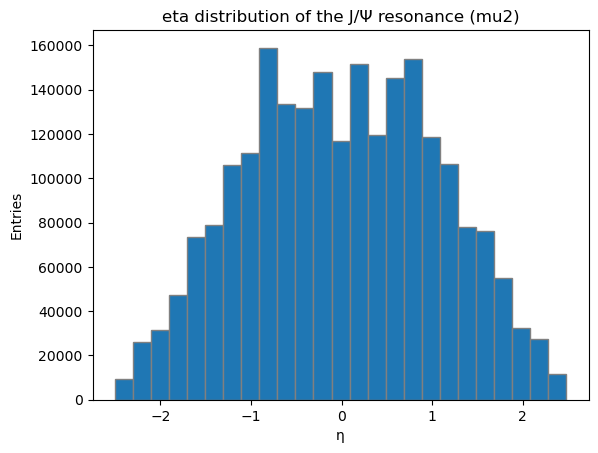

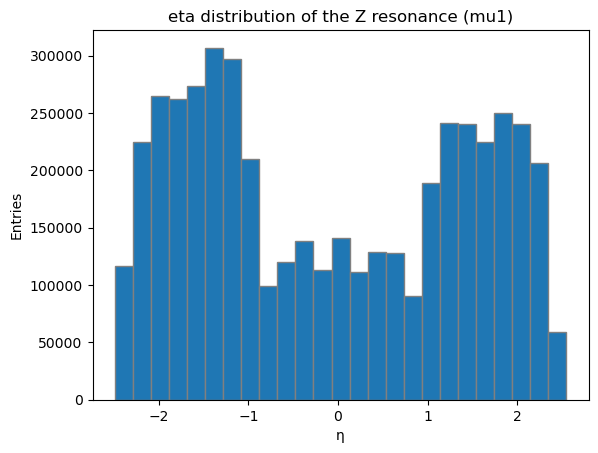

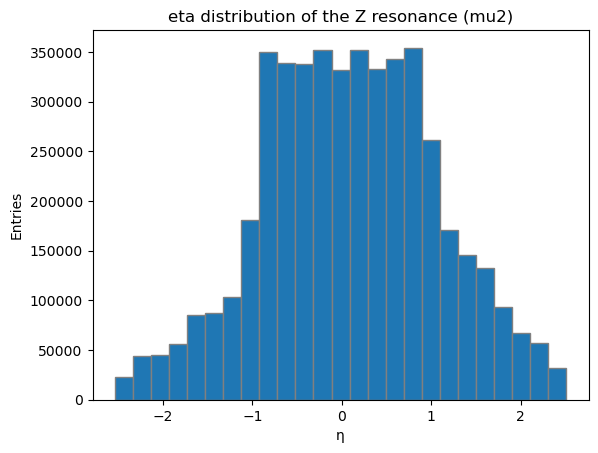

In [10]:
#plot phi distribution Jpsi
plt.hist(jpsi.mu1.eta, bins = 25, ec = "grey")
plt.title("eta distribution of the J/Ψ resonance (mu1)")
plt.xlabel("η")
plt.ylabel("Entries")
plt.show()

plt.hist(jpsi.mu2.eta, bins = 25, ec = "grey")
plt.title("eta distribution of the J/Ψ resonance (mu2)")
plt.xlabel("η")
plt.ylabel("Entries")
plt.show()

#plot phi distribution Jpsi
plt.hist(zboson.mu1.eta, bins = 25, ec = "grey")
plt.title("eta distribution of the Z resonance (mu1)")
plt.xlabel("η")
plt.ylabel("Entries")
plt.show()

plt.hist(zboson.mu2.eta, bins = 25, ec = "grey")
plt.title("eta distribution of the Z resonance (mu2)")
plt.xlabel("η")
plt.ylabel("Entries")
plt.show()


As you can see, the distribution of pseudorapidities for the Z boson vaires greatly. This is because there is an asymmentry in the angle $\theta$ of the emitted muons. Since the transformation between $\theta$ and $\eta$, given by

\begin{equation}
     \eta = -\ln \left[ \tan\left(\frac{\theta}{2}\right) \right],
\end{equation}

is highly nonlinear, this difference is amplified resulting in the two vastly different distributions seen above. This is a problem for us, as muons with high pseudorapidites are measured by different detector components. Each with their own methodology and associated uncertainty. As we are interested in gaining an understanding of the detectors mass resolution, we will disregard muons with high pseudorapidities for simplicity.

<div class="alert alert-warning">
<strong><big> Exercise 1.7 </big></strong> 
    
   - From the $J/\Psi$ and Z DataFrames, remove all entries where at least one muon has a pseudorapidity of $|\eta| > 1.5$
            
</div>

In [11]:
#Remove all events with large eta:
maxEta = 1.5
jpsi   = jpsi[(np.abs(jpsi.mu1.eta) <= maxEta) & (np.abs(jpsi.mu2.eta) <= maxEta)]
zboson = zboson[(np.abs(zboson.mu1.eta) <= maxEta) & (np.abs(zboson.mu2.eta) <= maxEta)]

# Introduction to *uncertainties*

By now, i am sure you are familiar with the fact that the propagation of uncertainties is often the most tedious part of a lab course. Today however, packages exist that tremendously reduce the amount of work required to keep track of errors. One such module is the *uncertainties* package. With minimal effort on your part, it will perform all the heavy lifting. It has a user friendly documentation provided on its [*website*](https://pythonhosted.org/uncertainties/), but a short introduction will be given here. Throughout this course, you will be expected to keep track of the uncertainties of important results. 

If you are already familiar with this package, you may skip this chapter.

To define a variable with an uncertainty, *uncertainties* offers the *ufloat* method.

In [12]:
import uncertainties as unc

x = unc.ufloat(1,0.5) # x = 1 ± 0.5
y = unc.ufloat(5,0.3) # y = 5 ± 0.3
print(x)
print(y)

1.0+/-0.5
5.00+/-0.30


Once the variable has been declared, *uncertainties* will automatically propagate the uncertainty during calculations.

In [13]:
z = x + y
x_squared = x * x

print(z)
print(x_squared)

6.0+/-0.6
1.0+/-1.0


At any point you can retrieve the nominal value or error of a variable using *.n* or *.s*.

In [14]:
print("Nominal value of z:", z.n) #nominal value
print("Uncertainty of x_squared:", x_squared.s) #standart deviation

Nominal value of z: 6.0
Uncertainty of x_squared: 1.0


It also provides special functions like sine and cosine that are capable of automatically propagating errors in the *unumpy* module.

In [15]:
from uncertainties import unumpy as unp

z = unp.sin(x)
print(z)

0.84+/-0.27


*unumpy* also allows the handling of arrays of values with uncertainties.

In [16]:
listOfValues = [1,2,3]
listOfUncertainties = [0.1,0.2,0.3]

#define array
arr = unp.uarray(listOfValues,listOfUncertainties)
print("Array of numbers with uncertainties:", arr)
print("Values of the array:", unp.nominal_values(arr))
print("Uncertainties of the array:", unp.std_devs(arr))

Array of numbers with uncertainties: [1.0+/-0.1 2.0+/-0.2 3.0+/-0.3]
Values of the array: [1. 2. 3.]
Uncertainties of the array: [0.1 0.2 0.3]


When usung *uarray's*, uncertainties are also propagated when doing operations on the entire array.

In [17]:
print("Sum of array:", arr.sum())
print("Array squared:", arr*arr)

Sum of array: 6.0+/-0.4
Array squared: [1.0+/-0.2 4.0+/-0.8 9.0+/-1.7999999999999998]


<div class="alert alert-warning">
<strong><big> Exercise 1.8 </big></strong> 
    
The function $y(x) = m \cdot x + b$ has parameters $m = 5.5 \pm 0.3$ and $b = -2 \pm 0.5$.

Calculate y(x) for the values $x \in [-1.5 , 2, 5, 10]$ as well as its uncertainty. 
            
</div>

In [18]:
x_values = np.array([-1.5 , 2, 5, 10])

m = unc.ufloat(5.5,0.3)
b = unc.ufloat(-2, 0.5)

def y(x):
    return m*x+b

print(y(x_values))

[-10.25+/-0.6726812023536854 9.0+/-0.7810249675906654
 25.5+/-1.5811388300841898 53.0+/-3.0413812651491097]


<div class="alert alert-warning">
<strong><big> Part 2 </big></strong> 
    
Determining the resolution of the CMS Detector 
            
</div>

The shape of the resonances you have plotted in Part 1 is called a [Voigt profile](https://en.wikipedia.org/wiki/Voigt_profile). It is the result of [convolution](https://en.wikipedia.org/wiki/Convolution) between a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) and a [cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution). 

\begin{equation}
    \mathrm{Voigt}(M; \gamma, \sigma, \mu) = \mathrm{BreitWigner}(M; \Gamma, \mu) * \mathrm{Gaussian}(M; \sigma, \mu).
\end{equation}

The three distributions can be seen side by side in the cell below.
The Cauchy (or Lorentz) distribution is the theoretical shape of the resonance. However, this theoretical shape is "smeared out" by the detector resolution, which is approximatly given by a gaussian. The result is the Voigt Profile seen below.

<div class="alert alert-warning">
<strong><big> Exercise 2.0 </big></strong> 
    
Plot the three distributions. Their respective definitions are given below. Take care that the Breit-Wigner distribution is defined using the parameter $\Gamma$ whereas the Voigt profile is defined using $\gamma$ where $\gamma = \frac{\Gamma}{2}$. Feel free to toy around with the parameters.
            
</div>

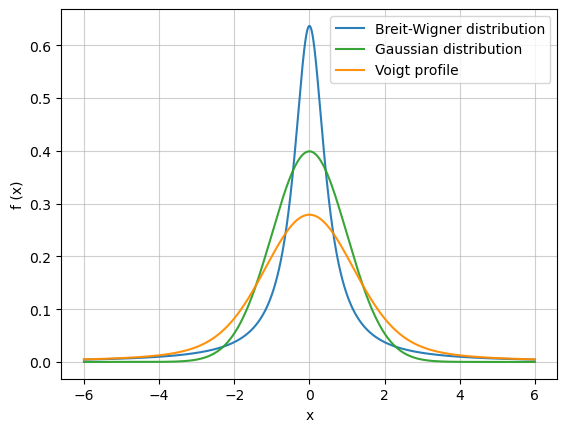

In [19]:
def BreitWigner(x,mu,Gamma):
    return 1/np.pi * (0.5*Gamma / ((x-mu)**2 + (0.5*Gamma)**2))
                      
def Gaussian(x,mu,sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * (x-mu)**2/sigma**2)

def VoigtProfile(x,mu,sigma,gamma):
    return voigt(x-mu,sigma,gamma) #function importet from scipy.special

xAxis = np.linspace(-6,6,100000)

#parmeters
Gamma = 1
mu = 0
sigma = 1
gamma = Gamma/2


#Breit Wigner
plt.plot(xAxis,BreitWigner(xAxis,mu,Gamma), label = "Breit-Wigner distribution", color='#1f77b4', alpha = 0.95)

#Gaussian
plt.plot(xAxis,Gaussian(xAxis,mu,sigma), label = "Gaussian distribution", color='#2ca02c', alpha = 0.95)

#Voigt profile
plt.plot(xAxis,VoigtProfile(xAxis,mu,sigma, gamma), label = "Voigt profile", color='darkorange', alpha = 0.95)

plt.grid(alpha = 0.6)
plt.legend()
plt.xlabel("x")
plt.ylabel("f (x)")
plt.show()

In theory, the decay width of the Z Boson could be determined by simply fitting a Voigt Profile onto the Z resonance. However, both the width of the Gaussian distribution (given by $\sigma$) and the width of the Cauchy distribution (given by $\Gamma$) contibute to the total width of the Z resonance in the dimuon spectrum. Therfore, a direct fit to the Z resonance leads to an inaccurate result for $\Gamma$ since it is hilghly correlated with $\sigma$, as seen in the cell below. Feel free to use this code as a template for future fits.


In [20]:
#model Function for the Z boson

def zModel(x,sigma,Gamma,mu,a,b,Ns,Nb):
    #normalized Voigt Distribution
    voigtprofile = Ns * voigt(x-mu,sigma,0.5*Gamma)
    
    #nomralized linear background:
    x0 = zbosonStart
    x1 = zbosonEnd
    m = np.mean(zboson.M.to_numpy())
    normConst = -0.5*(x1-x0)*(a*(2*m-x1-x0)-2*b)
    back = Nb/normConst * (a*(x-m)+b)
    return voigtprofile + back

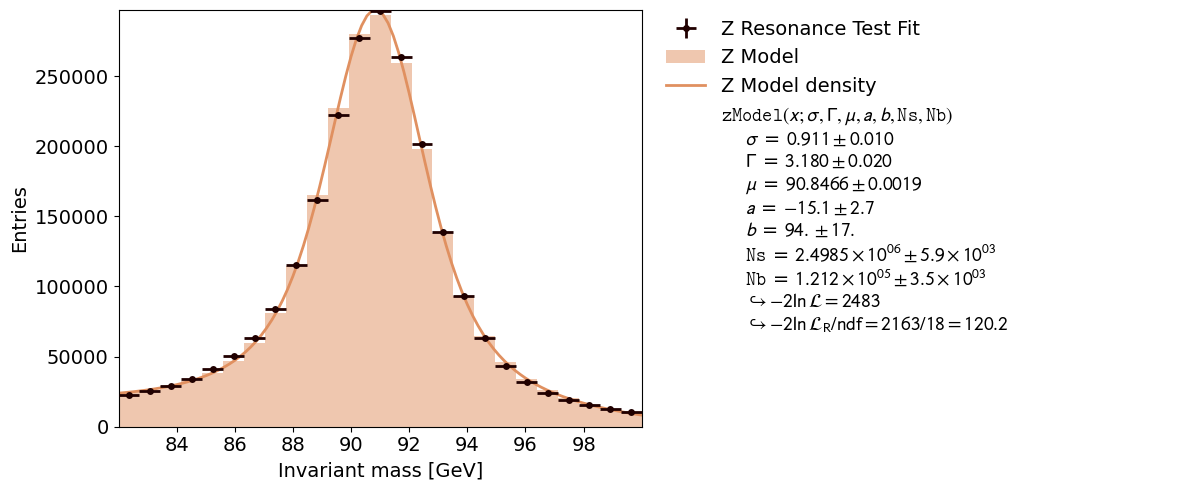

Result for Gamma: 3.179893869083997  GeV
Correlation coefficient of σ and Γ: -0.9323351345400291


In [21]:
#get invariant mass data for Z boson
massData = zboson.M.to_numpy()

#get max and min values for fit range
minM = np.nanmin(massData) 
maxM = np.nanmax(massData)
    
#initialize histogram   
histogram = kfe.HistContainer(n_bins=25, bin_range=(minM, maxM), fill_data=massData)
          
#parameters and their starting values
paramDict = {"a"    : -8,
             "b"    : 100,
             "mu"   : 90,
             "Ns"   : 0.95 * len(massData),
             "Nb"   : 0.05 * len(massData)
            }
    
#set up histogram fit    
fit = kfe.HistFit(data=histogram, model_function=zModel, density = False)

#pass starting parameters to the fit
fit.set_parameter_values(**paramDict)

#limit some parameters to improve convergence
fit.limit_parameter("mu",80,100)
   
#do fit
fitResults = fit.do_fit()


#plot the fit
plot = kfe.plot(fit, x_label = "Invariant mass [GeV]", y_label = "Entries", 
                data_label="Z Resonance Test Fit",
                model_label= "Z Model",
                save = False)

#print important results:
print("Result for Gamma:", fitResults["parameter_values"]["Gamma"], " GeV")
print("Correlation coefficient of σ and Γ:", fitResults["parameter_cor_mat"][0][1])

As you can see, with a correlation coefficient of about -0.94, the result for $\Gamma$ is highly unreliable.
To capture the decay width $\Gamma$ as accurately as possible, we can first determine an expression for the detector resolution $\sigma$ seperately. This value will then be held constant during the fit of the Z resonance, allowing for a more accurate result.

The J/$\Psi$ resonance is perfect for this task. With an extremely small decay width of $\Gamma_{J/\Psi} \approx 0.0929 \;\mathrm{MeV}$, its shape is almost entirely determined by the (gaussian) detector resolution. Therefore, the detector resolution can be found by performing suitable fits to the J/$\Psi$ resonance.

Unfortunately, the detector resolution is not constant. The equation for the invariant mass (squared) can be written as:

\begin{equation}
 M^2 = 2p_1p_2(1-\cos\theta) =  2 \frac{p_{T,1}}{\sin\theta_1} \frac{p_{T,2}}{\sin\theta_2} (1-\cos\theta)
\end{equation}

where $p_{T,1}$ and $p_{T,2}$ are the transverse momenta of mu1 and mu2 respectively. $\theta_1$ and $\theta_2$ are the angle between the muons momenta $p_i$ and the positive directions of the beam line. $\theta$ is the angle between the muon momenta $p_1$ and $p_2$.

The angle $\theta_i$ is related to the particles pseudorapidity $\eta_i$ via
\begin{equation}
   \eta_i = -\ln \left[ \tan\left(\frac{\theta_i}{2}\right) \right]. 
\end{equation}

Since we have reduced out dataset to muons with small $\eta$, we can ignore this dependency.

To simplify further, we will only consider parts of the dataset where $p_{T,1} \approx p_{T,2} \equiv p_T$.

This effectively reduces the equation for the invariant mass to

\begin{equation}
M^2 = 2 p_T^2 (1-\cos(\theta)).
\end{equation}

Using Gaussian error propagation, we can derive an expression for the mass resolution $\Delta M$:

\begin{equation}
\Delta (M^2) =2 M \Delta M =  4 p_T \Delta p_T (1-\cos(\theta))
\end{equation}

and therfore

\begin{equation}
\frac{\Delta M}{M} = \frac{\Delta p_T}{p_T}.
\end{equation}

This expression is extremely useful. If we manage to find an expression for the transverse momentum resolution $\frac{\Delta p_T}{p_T}$ using the $J/\Psi$ resonance, we can extrapolate it to the high transverse momenta of Z muons. Using the equation above, we can then determie the mass resolution of the CMS detector at the Z boson.

<div class="alert alert-warning">
<strong><big> Exercise 2.1 </big></strong> 
    
- Create a scatterplot of the transverse momenta $p_{T,1}$ and $p_{T,2}$ with $p_{T,1}$ on the x axis.

Given the large dataset, it is helpful to choose a small marker and to manually adjust the limits of the axes to properly see the data. Additionally, the parameter `alpha` can be used to adjust the transparancy of the marker.
            
</div>

(0.0, 100.0)

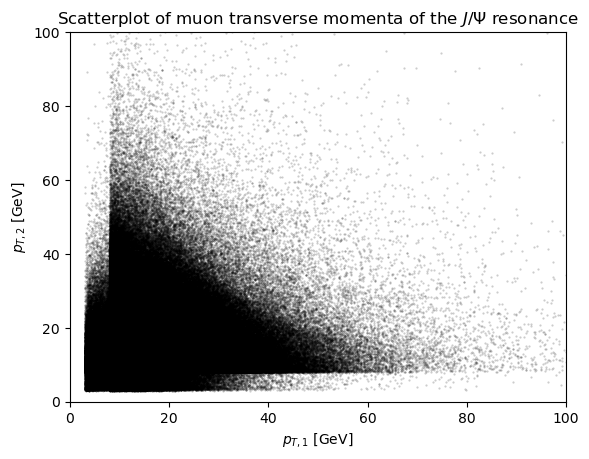

In [22]:
plt.scatter(jpsi.mu1.pt,jpsi.mu2.pt, marker = ".", alpha = 0.2, linewidth = 0, s=10, color = "black")
plt.xlabel("$p_{T,1}$ [GeV]")
plt.ylabel("$p_{T,2}$ [GeV]")
plt.title("Scatterplot of muon transverse momenta of the $J/\Psi$ resonance")
plt.xlim(0,100)
plt.ylim(0,100)

As you can see, the scatterplot above seems to be a result of two different distributions layerd on top of one another. This is no coincidence. Data aquisition at the CMS detector is complicated as a tremendous amount of data is generated due to the enourmus amount of particles generated in the collisions. To help cut down on storage costs and computation time, the CMS experiment uses a trigger system. Only if a trigger deems an event noteworthy, is the data commited to memory for further analysis. The two distributions seen above are the results of different triggers activating.
For the purposes of this lab, we will focus solely on the larger of the two distributions,



To find the transverse momentum resolution $\Delta p_{T}$, we can divide the $J/\Psi$ dataset seen above into bins along the diagonal $p_{T,1} \approx p_{T,2}$. Since the width of the $J/\Psi$ resonance is dominated by the detector resolution, we can perform a fit of a gaussian to each of the subsets to determine the mass resolution $\Delta M$, given by the standart deviation $\sigma$ of the fitted gaussian, as a function of the transverse momentum $p_T$. 


The function below will help you with that.
Execute the following cell:



In [23]:
def partition(df, xcuts, ycuts, threshhold = 0, showPlot = True, diagOnly = False, title = "Partitioned Data", path = "", xlim = 0, ylim = 0, legend = False):
    
    partitions = [] #list of df's each contatining data of one partition
    
    for i in range(len(xcuts)-1):
        for j in range(len(ycuts)-1):
            
            if(diagOnly and i!=j):
                continue
            
            area = "sub" + str(i) + str(j) #as in sub00 for bottom left corner
            
            pt1Filter = (df.mu1.pt > xcuts[i]) & (df.mu1.pt < xcuts[i+1])
            pt2Filter = (df.mu2.pt > ycuts[j]) & (df.mu2.pt < ycuts[j+1])
            Filter = (pt1Filter & pt2Filter)
        
            numberOfDataPointsInPartition = len(df[Filter].M.to_numpy())
            
            if(numberOfDataPointsInPartition >= threshhold):
                
                #create df for this partition
                dfPartition = pd.DataFrame(columns = pd.MultiIndex.from_arrays([3*[area],["M","mu1pt","mu2pt"]])) 
                
                dfPartition[area, "mu1pt"] = df[Filter].mu1.pt
                dfPartition[area, "mu2pt"] = df[Filter].mu2.pt
                dfPartition[area, "M"]     = df[Filter].M
                dfPartition.reset_index(drop=True, inplace = True)
                partitions.append(dfPartition)
    
    if len(partitions) != 0 :
        subsets = pd.concat(partitions, axis=1)
        subsets = subsets.sort_index(axis=1)
    else:
        print("Not enough data to create Partitioning")
        return(0,0)
    
    #save names of areas seperately
    areas = []
    [areas.append(tupel[0]) for tupel in subsets.columns]
    areas = np.sort(list(set(areas)))
    
    #plot result
    if showPlot == True:
        fig, ax = plt.subplots()
    
        ax.scatter(df.mu1.pt.to_numpy(),df.mu2.pt.to_numpy(), marker = ".", color = "black", alpha = 0.1, linewidth = 0, s=10)
        for area in areas:
            ax.scatter(subsets[area,"mu1pt"].to_numpy(),subsets[area,"mu2pt"].to_numpy(), marker = ".", alpha = 0.2, linewidth = 0, s=10, label = area)
           
        if xlim != 0 and ylim != 0:
            ax.set_xlim(0,xlim)
            ax.set_ylim(0,ylim)
        else:   
            maxCut = max(xcuts[-1]+50,ycuts[-1]+50)
            ax.set_xlim(0,maxCut)
            ax.set_ylim(0,maxCut)
        ax.set_title(title)
        ax.set_xlabel("$p_{T,1}$ [GeV]")
        ax.set_ylabel("$p_{T,2}$ [GeV]")
        if path != "":
            fig.savefig(path +".jpg",bbox_inches='tight', dpi=400)
        if legend == True:
            lgnd = plt.legend(loc = 1)
            for k in range(len(areas)):
                lgnd.legend_handles[k]._sizes = [60]
                lgnd.legend_handles[k].set_alpha(1)
        plt.show()
    
    
    return areas,subsets


The partition function defined above can be used to select different subsets of data from the $p_{T,1}$-$p_{T,2}$-scatterplot.
The four important paramters for this lab course are:

    -df: dataset to be used
    -xcuts: array of x coordinates where the dataset is sliced
    -ycuts: array of y coordinates where the dataset is sliced
    -diagOnly: boolean variable. If True, only partitions on the diagonal are created
    
The function returns a DataFrame with the data in each subset along with the names of each subset.
This allows us to easily loop through the different partitions of data. The names of each subset follow the pattern subXY, where X and Y are the coordinates in the grid of created subsets.
    
This is best illustrated by the example below.

Feel free to experiment with this function as we will be using it a lot during this lab.

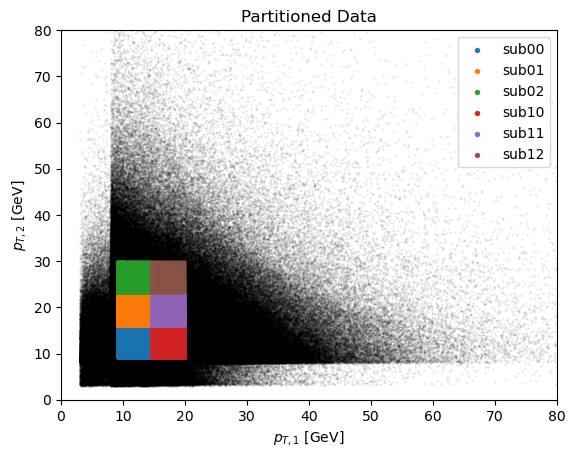

Names of the areas:
['sub00' 'sub01' 'sub02' 'sub10' 'sub11' 'sub12']

Data in each subset:


sub00                           sub01                        \
               M      mu1pt      mu2pt         M      mu1pt      mu2pt   
0       3.090386   9.085582   9.120700  3.147228  10.237534  18.365425   
1       3.104084  11.631476  14.190401  3.089614  12.113932  19.784372   
2       3.126736  12.590203  14.950843  3.027662  11.282715  20.088846   
3       3.041967  12.896897  14.603890  3.101800  13.089158  19.093994   
4       3.073283  11.121920  13.065853  3.101169  10.878297  16.769209   
...          ...        ...        ...       ...        ...        ...   
358864  3.092734  13.564555  13.049940       NaN        NaN        NaN   
358865  3.088477  10.894543  15.575168       NaN        NaN        NaN   
358866  3.111636  13.135930  11.345273       NaN        NaN        NaN   
358867  3.060076  14.189580  11.546965       NaN        NaN        NaN   
358868  3.119267  13.381288   9.595886       NaN        NaN        NaN   

           sub02                           sub10                        \
               M      mu1pt      mu2pt         M      mu1pt      mu2pt   
0       3.180505  14.021620  29.234570  3.114447  15.715366  11.412709   
1       3.083511   9.084893  23.115274  3.136011  17.012249   9.717331   
2       3.101057   9.340912  24.871060  3.086345  18.621862  15.242179   
3       3.071181  10.100777  23.230871  3.079654  16.371544  14.604432   
4       3.017934  12.085468  28.267885  3.077357  14.836610  14.137210   
...          ...        ...        ...       ...        ...        ...   
358864       NaN        NaN        NaN       NaN        NaN        NaN   
358865       NaN        NaN        NaN       NaN        NaN        NaN   
358866       NaN        NaN        NaN       NaN        NaN        NaN   
358867       NaN        NaN        NaN       NaN        NaN        NaN   
358868       NaN        NaN        NaN       NaN        NaN        NaN   

           sub11                           sub12                        
               M      mu1pt      mu2pt         M      mu1pt      mu2pt  
0       3.091103  15.939741  19.444630  3.103455  15.104261  23.545662  
1       3.106599  19.951216  22.629810  3.106733  15.940276  23.568754  
2       3.158004  14.564761  20.884012  3.121443  16.223583  26.294971  
3       3.091387  17.060580  19.914963  3.096415  18.806627  27.818884  
4       3.081655  16.286976  21.709930  3.084618  15.911560  24.890411  
...          ...        ...        ...       ...        ...        ...  
358864       NaN        NaN        NaN       NaN        NaN        NaN  
358865       NaN        NaN        NaN       NaN        NaN        NaN  
358866       NaN        NaN        NaN       NaN        NaN        NaN  
358867       NaN        NaN        NaN       NaN        NaN        NaN  
358868       NaN        NaN        NaN       NaN        NaN        NaN  

[358869 rows x 18 columns]

In [24]:
#define the cuts along the x axis: 
xCutJPsi = [9, 14.5, 20]
#define the cuts along the y axis: 
yCutJPsi = np.linspace(9,30,4)

#create the subsets
areasJPsi, subsetsJPsi = partition(jpsi,xCutJPsi,yCutJPsi, legend = True)

#print the names of the subsets
print("Names of the areas:")
print(areasJPsi)

#display the data in the different subsets
print("") #empty line
print("Data in each subset:")
subsetsJPsi


    
<div class="alert alert-info">
<strong><big> Hint </big></strong> 
    
As you can see, not all subset contain the same amount of data. In this case, pandas simply fills the empty entries with NaN (Not a Number). When accesing the data, one can simply remove all NaN entries using boolean masking aswell:
    
`massData = df["areaName","M"].to_numpy()`
    
`massData = massData[~(np.isnan(massData))]`

</div>

<div class="alert alert-warning">
<strong><big> Exercise 2.2 </big></strong> 
    
- Create a few subsets along the $p_{T,1}$-$p_{T,2}$ diagnal. Focus only on the larger of the two distributions. That is, start your partitions around the (9 GeV,9 GeV) mark. 

- Plot a invariant mass histogram of one of the subsets.
</div>

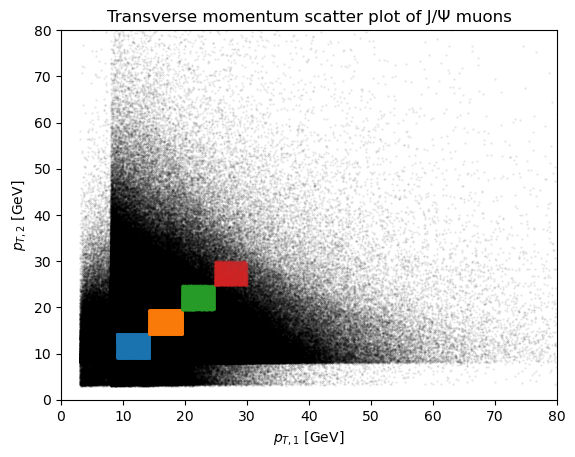

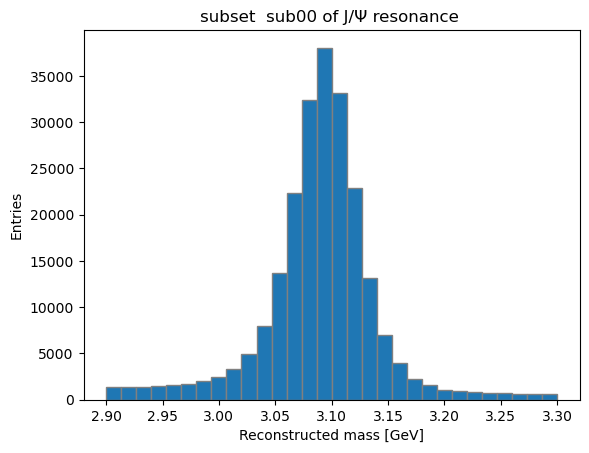

sub00                           sub11                        \
               M      mu1pt      mu2pt         M      mu1pt      mu2pt   
0       3.090386   9.085582   9.120700  3.091103  15.939741  19.444630   
1       3.104084  11.631476  14.190401  3.086345  18.621862  15.242179   
2       3.073283  11.121920  13.065853  3.079654  16.371544  14.604432   
3       3.125250  13.297479  10.150555  3.114031  16.549591  16.052895   
4       3.101411  11.651941  13.700218  3.086216  14.742945  15.794770   
...          ...        ...        ...       ...        ...        ...   
226173  3.138272  13.065657  13.512151       NaN        NaN        NaN   
226174  3.092734  13.564555  13.049940       NaN        NaN        NaN   
226175  3.111636  13.135930  11.345273       NaN        NaN        NaN   
226176  3.060076  14.189580  11.546965       NaN        NaN        NaN   
226177  3.119267  13.381288   9.595886       NaN        NaN        NaN   

           sub22                           sub33                        
               M      mu1pt      mu2pt         M      mu1pt      mu2pt  
0       3.106599  19.951216  22.629810  3.050840  25.573076  27.515493  
1       3.088539  19.679419  20.187395  3.064750  24.946844  25.994781  
2       3.145520  22.579256  21.504460  3.108709  25.573977  28.702791  
3       3.092106  24.136850  23.899527  2.963554  27.677097  25.470377  
4       3.117686  22.742281  19.617626  3.104782  26.837107  26.478962  
...          ...        ...        ...       ...        ...        ...  
226173       NaN        NaN        NaN       NaN        NaN        NaN  
226174       NaN        NaN        NaN       NaN        NaN        NaN  
226175       NaN        NaN        NaN       NaN        NaN        NaN  
226176       NaN        NaN        NaN       NaN        NaN        NaN  
226177       NaN        NaN        NaN       NaN        NaN        NaN  

[226178 rows x 12 columns]

In [25]:
xCutJPsi = np.linspace(9,30,5)
yCutJPsi = np.linspace(9,30,5)

titl = "Transverse momentum scatter plot of J/Ψ muons"
areasJPsi, subsetsJPsi = partition(jpsi,xCutJPsi,yCutJPsi, diagOnly = True, threshhold = 500, title = titl, xlim = 80, ylim = 80)

#plot invariant mass histogram of subset
plt.hist(subsetsJPsi["sub00"].M, bins = 30, ec = "grey")
plt.title("subset  sub00 of J/Ψ resonance ")
plt.xlabel("Reconstructed mass [GeV]")
plt.ylabel("Entries")
plt.show()

subsetsJPsi

## Some remarks on model functions

We can now fit a gaussian distribution to the histogram above to obtain our estimate for the mass resolution $\Delta M$ for this subset of the data and with that, calculate the constant c. Since fitting distributions to data is a common task in physics, it is worth spending some time thinking about construting a model function.

In order to obtain good fit results, it is important to not only parameterize the resonance itself, but also the surrounding background noise. Furthermore, when dealing with statistical distributions, it is good practice to parameterize the model function in terms of the underlying probability density functions (PDF's). The PDF's can then be scaled to the correct proportions by including an additional parameter N. This way, each of the parameters in the model function has a clear meaning associated with it. Parameters contained in the PDF, such as the standart deviation $\sigma$, determine the shape of the distribution, while the scaling parameter N is an estimate of the number of entries in the dataset that make up this distribution.

The model funtion then takes the basic form

\begin{equation}
    f(x) = N_s \cdot R(x) + N_b \cdot B(x)
\end{equation}

Here, $R(x)$ and $B(x)$ represent the the PDF's describing the resonance and the background noise respectively. Each of the distributions are then scaled up by their respective factors $N_s$ and $N_b$.

Since the shape of the $J/\Psi$ resonance is largely determined by the detector resolution, it an be assumed to be gaussian, leading to 

\begin{equation}
     R(x) = \frac{1}{\sqrt{2\pi}\sigma} \cdot \exp{ \left( -\frac{1}{2} \frac{(x-\mu)^2}{\sigma ^2} \right)}.
\end{equation}

For the background noise, no general PDF is available. However, the noise surrounding the resonance is largely flat. We can therefore reasonably describe it using a linear function. In order to minimize parameter correlations, the polynomial is centered at the mean of the distribution.

\begin{equation}
     p(x) = a(x-\mu)+b
\end{equation}

Since we want our Background in the shape of a PDF, we have to normalize this polynomial, leading to

\begin{equation}
    B(x) = \frac{a(x-\mu)+b}{\int_{x_0}^{x_1}{p(x)} dx},
\end{equation}

where $x_0$ and $x_1$ are the start- and enpoint of our dataset. You can see the finished model funtion implemented in the cell below.





In [26]:
def jpsiModel(x, mu, sigma,a,b,Ns,Nb):
    #normalized gaussian:
    gauss = Ns * (np.exp(-0.5 * ((x - mu) / sigma) ** 2) / np.sqrt(2.0 * np.pi * sigma** 2))
    
    #nomralized linear background:
    x0_jpsi = jpsiStart
    x1_jpsi = jpsiEnd
    m_jpsi = np.mean(jpsi.M.to_numpy())
    normConst = -0.5*(x1_jpsi-x0_jpsi)*(a*(2*m_jpsi-x1_jpsi-x0_jpsi)-2*b)
    background = Nb/normConst * (a*(x-m_jpsi)+b)
    
    return gauss + background

<div class="alert alert-warning">
<strong><big> Exercise 2.3 </big></strong> 

- Calculate the mass of the $J/\Psi$ meson by taking the average of the recorded invariant masses of the entire $J/\Psi$ dataset.
    
- Use the code snippet below to fit a Gaussian Distribution to the invariant mass histogram of each subset. 

- Keep track of the obtained mass resolution $\Delta M$ as well as the average transverse momentum $\overline{p_T}$ of each bin.

</div>

In [27]:
#calculate mass of jpsi from entire dataset for further calculations
massJPsi = np.mean(jpsi.M)
error_massJPsi = np.std(jpsi.M,ddof = 1) / np.sqrt(len(jpsi.M))
MJPsi = unc.ufloat(massJPsi,error_massJPsi) #masse JPsi
print(MJPsi)

3.08969+/-0.00004


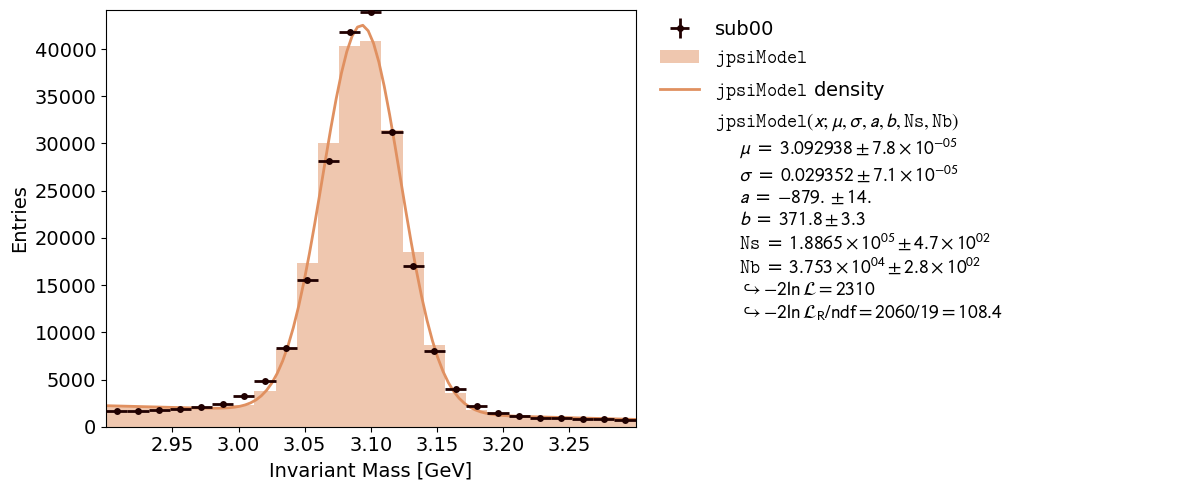

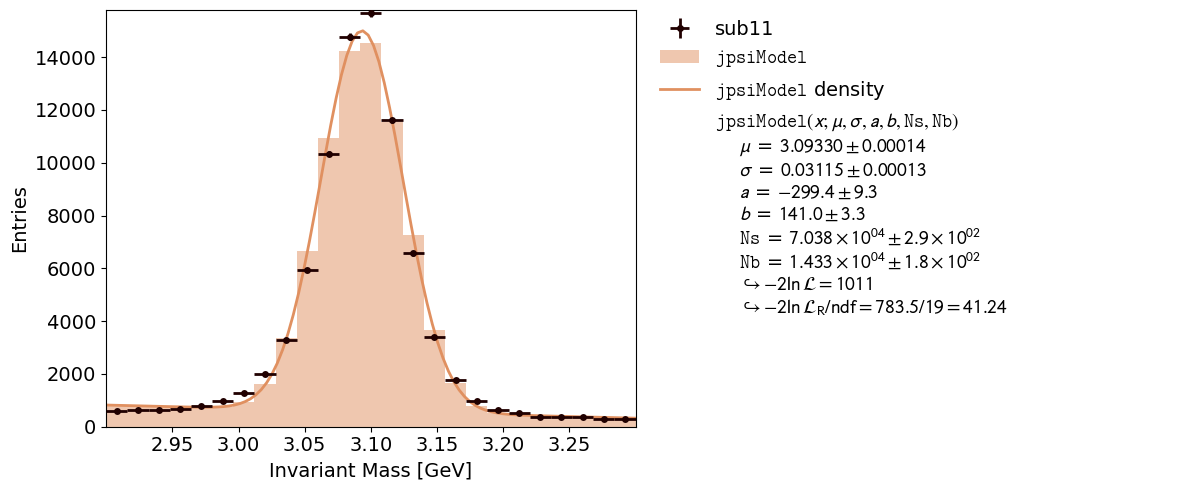

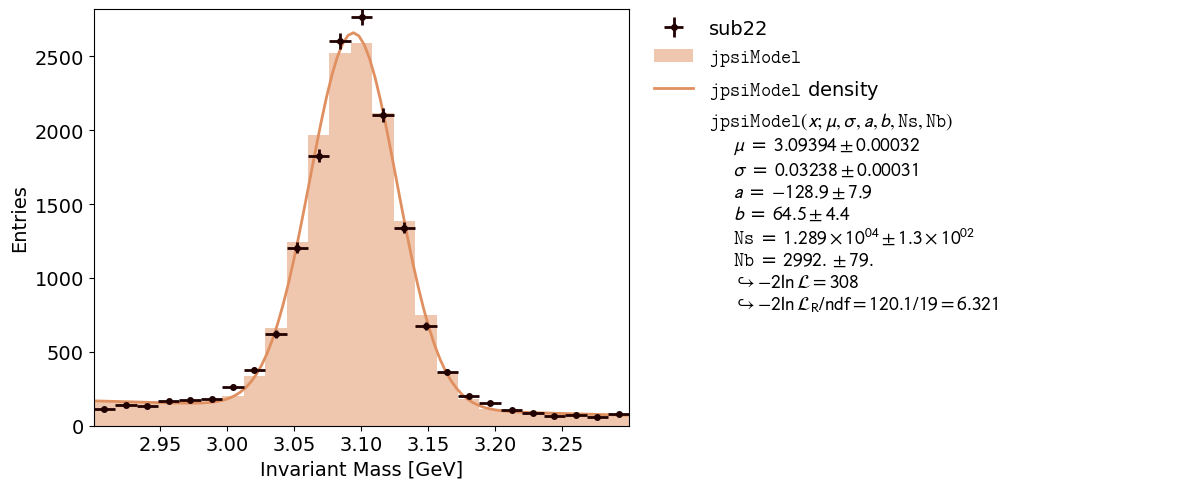

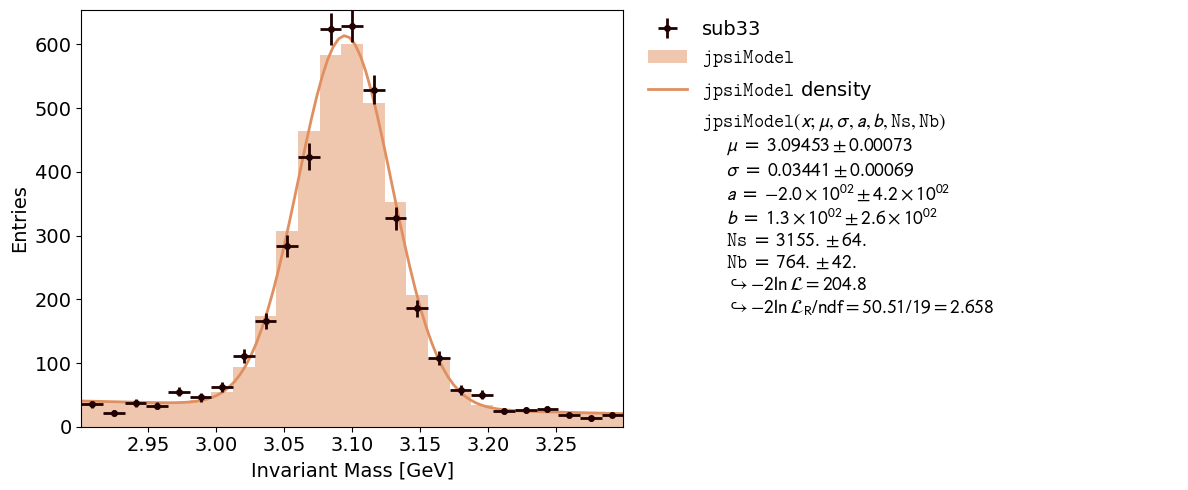

In [28]:
jpsiMassResolution_diag = {}       #result of fit (sigma)
avgMuPt_diag = {} #required to calculate pt2 resolution

for area in areasJPsi:
    #prepare Data For Fit
    massData = subsetsJPsi[area,"M"].to_numpy()
    massData = massData[~(np.isnan(massData))] #remove NaN (not a number) entries
    pt1 = subsetsJPsi[area,"mu1pt"].to_numpy()
    pt1 = pt1[~(np.isnan(pt1))]
    pt2 = subsetsJPsi[area,"mu2pt"].to_numpy()
    pt2 = pt2[~(np.isnan(pt2))]
    pt = np.concatenate((pt1,pt2)) #combine pt of both muons
    
    minM = np.nanmin(massData)
    maxM = np.nanmax(massData)
    histogram = kfe.HistContainer(n_bins=25, bin_range=(minM, maxM), fill_data=massData)
    #alternatively use jpsistart and jspiend for bin range
    
    fit = kfe.HistFit(data=histogram, model_function=jpsiModel, density = False)
    
    paramDict = {"a" : -80,
                 "b" : 100,
                 "sigma":0.03,
                 "mu": 3,
                 "Ns"  : 0.99 * len(massData),
                 "Nb" : 0.01 * len(massData)
                }
    
    fit.set_parameter_values(**paramDict)
    fit.limit_parameter("sigma",0,0.5) #must be positive
    fit.limit_parameter("mu",2,4)
    fit.data_container.label = area
    
    result = fit.do_fit()  # do the fit
    sigma = fit.parameter_values[1] #uncertainty in m
    error_sigma = fit.parameter_errors[1]
    
    jpsiMassResolution_diag[area] = unc.ufloat(sigma,error_sigma)
    
    avgMuPt_diag[area] = unc.ufloat(np.average(pt),np.std(pt2,ddof = 1) / np.sqrt(len(pt2)))
    
    plot = kfe.Plot(fit)
    plot.x_label = "Invariant Mass [GeV]"
    plot.plot()
    plt.show()
    

<div class="alert alert-warning">
<strong><big> Exercise 2.4 </big></strong> 
    
- Use the results obtained above to calculate $\frac{\Delta p_{T}}{p_{T}}$ for all partitions.
    
- Perform a suitable fit to obtain a relationship between the two quantities based on the Glückstern formula. Be sure to save the resulting fit parameters.
 
\begin{equation}
\frac{\Delta p_T}{p_T} \propto \frac{\Delta x}{B L^2 \sqrt{N}}  \cdot p_T
\end{equation}
    
    

</div>

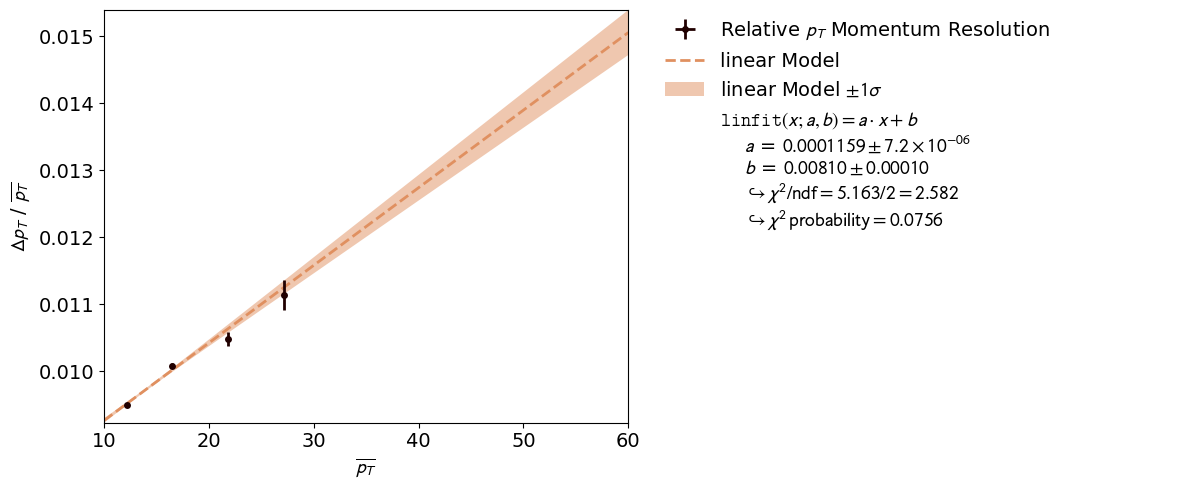

In [29]:
#calculate error of pt2
massResolution = np.array(list(jpsiMassResolution_diag.values()))
pt = np.array(list(avgMuPt_diag.values()))

ptResolution = massResolution/MJPsi

def linfit(x,a,b):
    return a*x+b

fit = kfe.XYFit([unp.nominal_values(pt),unp.nominal_values(ptResolution)],model_function = linfit)
fit.add_error(axis = "y", err_val = unp.std_devs(ptResolution))
res = fit.do_fit()

plot = kfe.plot(fit, x_label = "$\overline {p_{T}}$", y_label = "$\Delta p_{T}$ / $\overline {p_{T}}$", 
                x_range=(10,60),
                data_label="Relative $p_{T}$ Momentum Resolution",
                model_label= "linear Model",
                model_expression="{a} \cdot {x} +{b}",
                save = False)

#save fit results
a = unc.ufloat(res["parameter_values"]["a"],res["parameter_errors"]["a"])
b = unc.ufloat(res["parameter_values"]["b"],res["parameter_errors"]["b"])


<div class="alert alert-warning">
<strong><big> Exercise 2.5 </big></strong> 
    
- Use your fit results from above to write a function that takes values for $p_{T}$  and calculates the corresponding mass resolution of the CMS detector for the Z boson according to the formula
    
\begin{equation}
    \frac{\Delta M}{M} = \frac{\Delta p_T}{p_T}.
\end{equation}
    
- Again, you can approximate the mass $M_Z$ as the mean of the invariant masses of the Z resonance.
    
</div>

In [30]:
#calculate relative resolution based on extrapolation above
def ptRes(pt):
    return  a* pt + b

In [31]:
#calculate mass of Z for future Calculations
massZ = np.mean(zboson.M)
error_massZ = np.std(zboson.M,ddof = 1) / np.sqrt(len(zboson.M))
MZ = unc.ufloat(massZ,error_massZ)
print(MZ)

90.6168+/-0.0020


In [32]:
def getmassResolutionZ(pt):
    return MZ * ptRes(pt)

<div class="alert alert-warning">
<strong><big>Part 3</big></strong> 
    
Analyzing the Z Boson
   
</div>

<div class="alert alert-warning">
<strong>Exercise 3.1</strong> 
    
- Plot the $p_T$ scatterplot of the Z resonance


</div>

(0.0, 150.0)

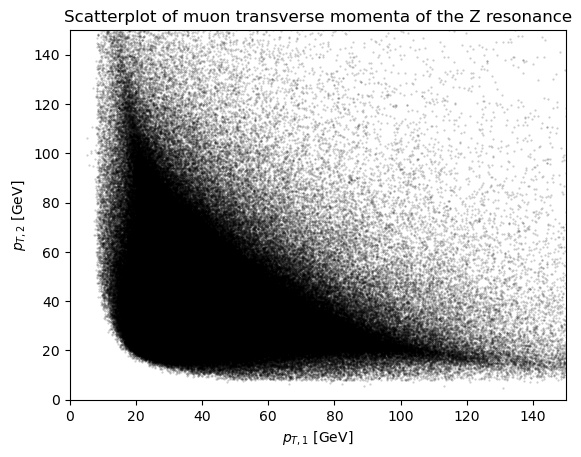

In [33]:
plt.scatter(zboson.mu1.pt,zboson.mu2.pt, marker = ".", alpha = 0.2, linewidth = 0, s=10, color = "black")
plt.xlabel("$p_{T,1}$ [GeV]")
plt.ylabel("$p_{T,2}$ [GeV]")
plt.title("Scatterplot of muon transverse momenta of the Z resonance")
plt.xlim(0,150)
plt.ylim(0,150)

<div class="alert alert-warning">
<strong>Exercise 3.2</strong> 
    
- Partition the $p_T$ scatterplot into smaller subsets along the diagonal using the partition function.
- Plot the mass histogram for each of the partitions you have created. Make sure that each partition contains enough data for a fit. Adjust your partitions if neccesary.


</div>

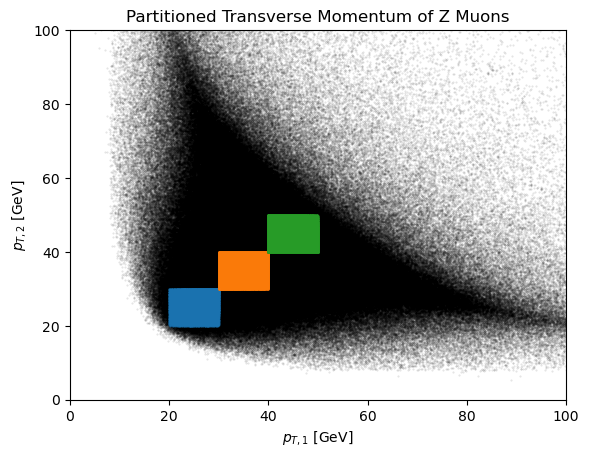

In [34]:
xCutZ = np.linspace(20,50,4) 
yCutZ = np.linspace(20,50,4)


titl = "Partitioned Transverse Momentum of Z Muons"
areasZ, subsetsZ = partition(zboson,xCutZ,yCutZ,diagOnly =True, threshhold = 10000, title = titl)

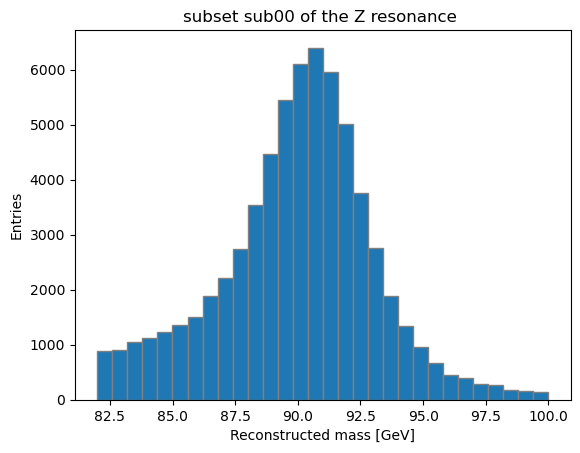

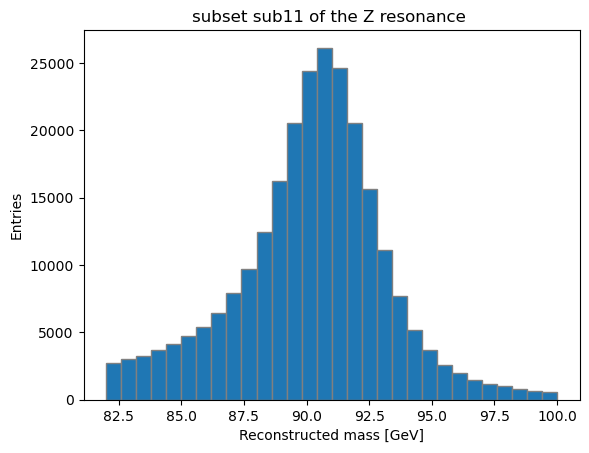

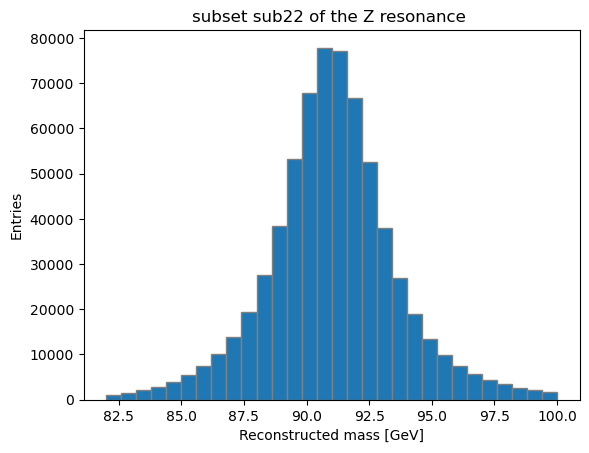

In [35]:
for area in areasZ:
    #plot invariant mass histogram of subset
    plt.hist(subsetsZ[area].M, bins = 30, ec = "grey")
    plt.title("subset " +area +" of the Z resonance ")
    plt.xlabel("Reconstructed mass [GeV]")
    plt.ylabel("Entries")
    plt.show()

Finally, we can determine the decay width of the Z boson. Since we have subdivided the resonance into multiple smaller partitions, we could simply fit each resonance seperatly and average the resulting values for $\Gamma_Z$. However, a much better approach is to simultaneously fit all partitions to a single model. For this purpose, kafe2 provides the `MultiFit` function. It allows us to pass a whole list of fits and model functions as an input. `MultiFit` will then optimize the model functions to all datasets simultaneosly and produce a single resut for $\Gamma_Z$. However, since the exact shape of the resonance and its surrounding noise differ slightly from partition to partition, the only parameters that should be fittet to all partitions are the decay width $\Gamma_Z$ as well as the mean $\mu$ of the resonance. For kafe2, this requires that each partition gets its own model function with unique parameters for the resonance and background noise, but with a shared parameter for the width $\Gamma$ and mean $\mu$. To differentiate the other parameters between the model functions, we cann simpy add the suffix `_subXY` to each of the varable to give them a unique name for each partition.

The model functions for the first two diagonal partitions can be seen below.
For easy access to the model function, they have been added to a dictionary.

For example:
To acces the model function for the partition `sub00`, use `funcdict["sub00"]`

<div class="alert alert-warning">
<strong>Exercise 3.3</strong> 
    
- Add additional model functions to the cell below until you have one for each of the Z partitions defined above.
- Add them to the dictionary `funcdict`

</div>

In [36]:
x0 = zbosonStart
x1 = zbosonEnd
m = np.mean(zboson.M.to_numpy())

def zModel_sub00(x,sigma_sub00,Gamma,mu,a_sub00,b_sub00,Ns_sub00,Nb_sub00):
    voigtprofile = Ns_sub00 * voigt(x-mu,sigma_sub00,0.5*Gamma)
    normConst = -0.5 * (x1-x0)*(a_sub00*(2*m-x1-x0)-2*b_sub00)
    back = Nb_sub00/normConst * (a_sub00*(x-m)+b_sub00)
    return voigtprofile + back
def zModel_sub11(x,sigma_sub11,Gamma,mu,a_sub11,b_sub11,Ns_sub11,Nb_sub11):
    voigtprofile = Ns_sub11 * voigt(x-mu,sigma_sub11,0.5*Gamma)
    normConst = -0.5 * (x1-x0)*(a_sub11*(2*m-x1-x0)-2*b_sub11)
    back = Nb_sub11/normConst * (a_sub11*(x-m)+b_sub11)
    return voigtprofile + back
def zModel_sub22(x,sigma_sub22,Gamma,mu,a_sub22,b_sub22,Ns_sub22,Nb_sub22):
    voigtprofile = Ns_sub22 * voigt(x-mu,sigma_sub22,0.5*Gamma)
    normConst = -0.5 * (x1-x0)*(a_sub22*(2*m-x1-x0)-2*b_sub22)
    back = Nb_sub22/normConst * (a_sub22*(x-m)+b_sub22)
    return voigtprofile + back
def zModel_sub33(x,sigma_sub33,Gamma,mu,a_sub33,b_sub33,Ns_sub33,Nb_sub33):
    voigtprofile = Ns_sub33 * voigt(x-mu,sigma_sub33,0.5*Gamma)
    normConst = -0.5 * (x1-x0)*(a_sub33*(2*m-x1-x0)-2*b_sub33)
    back = Nb_sub33/normConst * (a_sub33*(x-m)+b_sub33)
    return voigtprofile + back

In [37]:
funcdict = {"sub00":zModel_sub00,"sub11":zModel_sub11,"sub22":zModel_sub22,"sub33":zModel_sub33}

<div class="alert alert-warning">
<strong>Exercise 3.4</strong> 
    
- Loop through the Z partitions and create (but do not execute) a list of fits for each with the extrapolated mass resolution and its uncertainty fixed to the values calculated above.

</div>

In [38]:
fitList = [] #list of all the fits to be performed simultaniously

for area in areasZ:
    massData = subsetsZ[area,"M"].to_numpy()
    massData = massData[~(np.isnan(massData))]
    
    minM = np.nanmin(massData)
    maxM = np.nanmax(massData)
    
    histogram = kfe.HistContainer(n_bins=25, bin_range=(minM, maxM), fill_data=massData)
    
    #calculate mass resolution for each area:
    pt1Data = subsetsZ[area,"mu1pt"].to_numpy()
    pt1Data = pt1Data[~(np.isnan(pt1Data))]
    pt2Data = subsetsZ[area,"mu2pt"].to_numpy()
    pt2Data = pt2Data[~(np.isnan(pt2Data))]
    
    ptData = np.concatenate((pt1Data,pt2Data))
    pt = np.mean(ptData)
    massResolution = getmassResolutionZ(pt)
    print(massResolution)
    
    index = "_"+area #appendix that differentiates the parameter names of different model functions
    
    #parameters and their starting values
    paramDict = {"a"+index : -8,
                 "b"+index : 100,
                 "sigma"+index: massResolution.n,
                 "Gamma": 2.5,
                 "mu":MZ.n,
                 "Ns"+ index : 0.95 * len(massData),
                 "Nb"+ index : 0.05 * len(massData)
                }
    
    
    fit = kfe.HistFit(data=histogram, model_function=funcdict[area], density = False)
    #set starting parameters to ensure convergence
    fit.set_parameter_values(**paramDict)
    
    
    #fix the determined uncertainty in the area
    fit.add_parameter_constraint(name="sigma"+index,value=massResolution.n, uncertainty = massResolution.s) 
    fit.limit_parameter("Ns"+index,0,massData.size)
    fit.limit_parameter("Nb"+index,0,massData.size)
    fit.limit_parameter("Gamma",0,5 )
    fitList.append(fit)

1.007+/-0.019
1.107+/-0.025
1.201+/-0.031


<div class="alert alert-warning">
<strong>Exercise 3.5</strong> 

- Perform the multi fit using the code snippet below and compare $\Gamma_Z$ to its literature value.

</div>

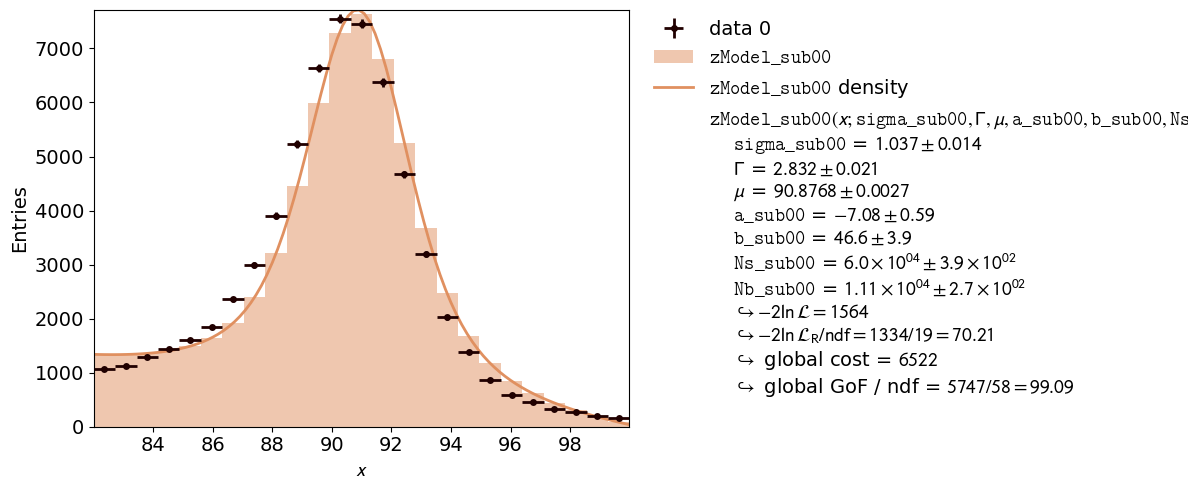

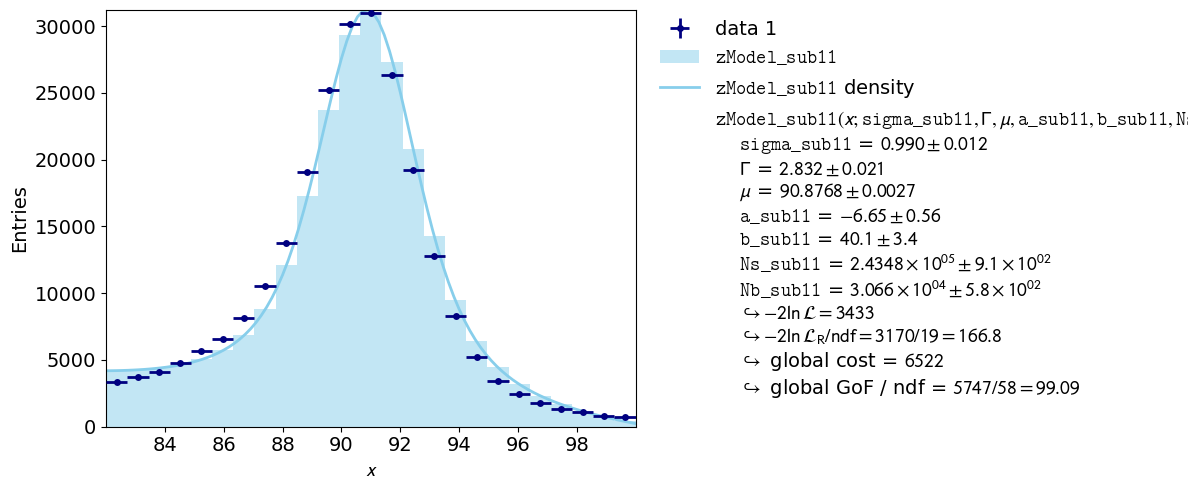

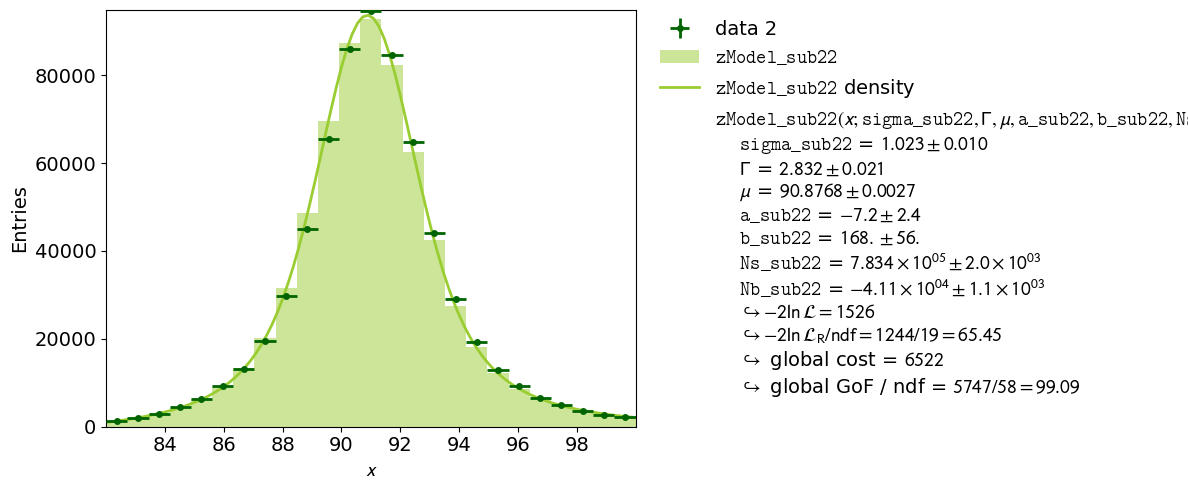

In [39]:
#Perform Multi Fit 
multi_fit = kfe.MultiFit(fit_list=fitList)
res = multi_fit.do_fit()
plot = kfe.Plot(multi_fit, separate_figures=True)
plot.plot()
plot.show()

While our result is an improvement over the naive method of fitting the entire Z resonance, there still is a discrepancy bewteen the literature value that the given uncertainty in $\Gamma$ cannot explain. This has a variety of of reasons. For one, we have largely ignored the dependance of the mass resolution on the pseudorapidity and we combined the the transverse momenta of the muons into a single value of $p_T$. 

However, there are additional effects we have completely neglected. The muons resulting from a Z decay are close to their critical energy, meaning their energy loss due to ionization is comparable to the energy loss to due the radiation of photons (refferred to as final state radiation). These photons, even when detected, can not always be assigned to the muons that created them, resulting in skewed measurements of their energy. This results in the resonances, especially the Z resonance, beeing skewed towars lower energies, broadening the peak. This also results in a poor Goodness of Fit (GoF), as the asymmetric broadening of the peak is not accounted for in our model function.

Additionaly, many different particles striking the detector in close proximity can lead to fautly track reconstruction leading to false measurements of their energy and momentum.


These effects could be accounted for using monte carlo simulations, but this would break the scope of this lab course.


<div class="alert alert-warning">
<strong>Exercise 3.6</strong> 

- Calculate the half life of the Z boson from the energy-time uncertainty in seconds.
 
  \begin{equation}
      \Gamma \cdot \tau \approx \hbar
  \end{equation}

</div>

In [40]:
Gamma = res["parameter_values"]["Gamma"]
tau = 1/Gamma * 6.58e-25
print("Mean lifetime of the Z Boson:", tau, "s")

Mean lifetime of the Z Boson: 2.3230487348742485e-25 s
